In [1]:
import pandas as pd

In [59]:
train = pd.read_csv('train_tim_12.1.csv', index_col=0)

In [4]:
from sklearn import datasets
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [60]:
train.shape

(51684, 110)

In [32]:
train.head(5)

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Caucasian,race_AfricanAmerican,race_Hispanic,race_Asian,gender_Male,admission_type_id_Unknown,admission_type_id_Emergency,admission_type_id_Elective,admission_type_id_Urgent,discharge_disposition_id_Unknown,discharge_disposition_id_Discharged to home,discharge_disposition_id_Discharged/transferred to SNF,discharge_disposition_id_Discharged/transferred to home with home health service,discharge_disposition_id_Discharged/transferred to another type of inpatient care institution,discharge_disposition_id_Discharged/transferred to another short term hospital,discharge_disposition_id_Discharged/transferred to ICF,discharge_disposition_id_Discharged/transferred to another rehab fac including rehab units of a hospital.,discharge_disposition_id_Discharged/transferred/referred to this institution for outpatient services,discharge_disposition_id_Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital,admission_source_id_Physician Referral,admission_source_id_Emergency Room,admission_source_id_Clinic Referral,admission_source_id_Transfer from a hospital,admission_source_id_Transfer from another health care facility,admission_source_id_Unknown,admission_source_id_HMO Referral,admission_source_id_Court/Law Enforcement,medical_specialty_InternalMedicine,medical_specialty_Family/GeneralPractice,medical_specialty_Cardiology,medical_specialty_Surgery-General,medical_specialty_Orthopedics,medical_specialty_Gastroenterology,medical_specialty_Nephrology,medical_specialty_Orthopedics-Reconstructive,medical_specialty_Psychiatry,medical_specialty_Emergency/Trauma,medical_specialty_Pulmonology,medical_specialty_Surgery-Cardiovascular/Thoracic,medical_specialty_Pediatrics-CriticalCare,medical_specialty_Surgery-Plastic,medical_specialty_Radiologist,medical_specialty_Speech,diag_1_Diabetes,diag_1_Circulatory,diag_1_Neoplasms,diag_1_Musculoskeletal,diag_1_Digestive,diag_1_Respiratory,diag_1_Genitourinary,diag_1_Mental Disorders,diag_1_Injury,diag_2_Diabetes,diag_2_Circulatory,diag_2_Neoplasms,diag_2_Respiratory,diag_2_Genitourinary,diag_2_Injury,diag_2_Digestive,diag_2_Mental Disorders,diag_2_Musculoskeletal,diag_3_Respiratory,diag_3_Diabetes,diag_3_Circulatory,diag_3_Musculoskeletal,diag_3_Genitourinary,diag_3_Neoplasms,diag_3_Digestive,diag_3_Injury,max_glu_serum_None,max_glu_serum_>300,max_glu_serum_Norm,max_glu_serum_>200,A1Cresult_>7,A1Cresult_>8,A1Cresult_Norm,metformin_Steady,metformin_Up,metformin_Down,repaglinide_Up,repaglinide_Steady,repaglinide_Down,glimepiride_Steady,glimepiride_Up,glimepiride_Down,glipizide_Steady,glipizide_Up,glipizide_Down,glyburide_Steady,glyburide_Down,glyburide_Up,pioglitazone_Steady,pioglitazone_Up,pioglitazone_Down,rosiglitazone_Steady,rosiglitazone_Up,rosiglitazone_Down,insulin_Steady,insulin_Down,insulin_Up,change_Ch,diabetesMed_Yes,readmitted_<30
1,0,1,41,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2,11,5,13,2,0,1,6,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,6,4,70,1,21,0,0,0,7,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
4,8,13,68,2,28,0,0,0,8,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
5,9,12,33,3,18,0,0,0,8,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0

In [64]:
train_readmitted = train['readmitted_<30']

In [65]:
train = train.rename(columns={'readmitted_<30': 'Readmitted'})

In [66]:
train_data = train.drop(['Readmitted'], axis=1)

In [67]:
train_data.head(2)

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Caucasian,race_AfricanAmerican,race_Hispanic,race_Asian,gender_Male,admission_type_id_Unknown,admission_type_id_Emergency,admission_type_id_Elective,admission_type_id_Urgent,discharge_disposition_id_Unknown,discharge_disposition_id_Discharged to home,discharge_disposition_id_Discharged/transferred to SNF,discharge_disposition_id_Discharged/transferred to home with home health service,discharge_disposition_id_Discharged/transferred to another type of inpatient care institution,discharge_disposition_id_Discharged/transferred to another short term hospital,discharge_disposition_id_Discharged/transferred to ICF,discharge_disposition_id_Discharged/transferred to another rehab fac including rehab units of a hospital.,discharge_disposition_id_Discharged/transferred/referred to this institution for outpatient services,discharge_disposition_id_Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital,admission_source_id_Physician Referral,admission_source_id_Emergency Room,admission_source_id_Clinic Referral,admission_source_id_Transfer from a hospital,admission_source_id_Transfer from another health care facility,admission_source_id_Unknown,admission_source_id_HMO Referral,medical_specialty_InternalMedicine,medical_specialty_Family/GeneralPractice,medical_specialty_Cardiology,medical_specialty_Surgery-General,medical_specialty_Orthopedics,medical_specialty_Gastroenterology,medical_specialty_Nephrology,medical_specialty_Orthopedics-Reconstructive,medical_specialty_Psychiatry,medical_specialty_Emergency/Trauma,medical_specialty_Pulmonology,medical_specialty_Surgery-Cardiovascular/Thoracic,medical_specialty_Pediatrics-CriticalCare,medical_specialty_Surgery-Plastic,medical_specialty_Radiologist,diag_1_Diabetes,diag_1_Circulatory,diag_1_Neoplasms,diag_1_Musculoskeletal,diag_1_Digestive,diag_1_Respiratory,diag_1_Genitourinary,diag_1_Mental Disorders,diag_1_Injury,diag_2_Diabetes,diag_2_Circulatory,diag_2_Neoplasms,diag_2_Respiratory,diag_2_Genitourinary,diag_2_Injury,diag_2_Digestive,diag_2_Mental Disorders,diag_2_Musculoskeletal,diag_3_Respiratory,diag_3_Diabetes,diag_3_Circulatory,diag_3_Musculoskeletal,diag_3_Genitourinary,diag_3_Neoplasms,diag_3_Digestive,diag_3_Injury,max_glu_serum_None,max_glu_serum_>300,max_glu_serum_Norm,max_glu_serum_>200,A1Cresult_>7,A1Cresult_>8,A1Cresult_Norm,metformin_Steady,metformin_Up,metformin_Down,repaglinide_Up,repaglinide_Steady,repaglinide_Down,glimepiride_Steady,glimepiride_Up,glimepiride_Down,glipizide_Steady,glipizide_Up,glipizide_Down,glyburide_Steady,glyburide_Down,glyburide_Up,pioglitazone_Steady,pioglitazone_Up,pioglitazone_Down,rosiglitazone_Steady,rosiglitazone_Up,rosiglitazone_Down,insulin_Steady,insulin_Down,insulin_Up,change_Ch,diabetesMed_Yes
1,0,1,41,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2,11,5,13,2,0,1,6,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [68]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(C=1e4)
logistic.fit(train_data,train_readmitted)

LogisticRegression(C=10000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [69]:
logistic.score(train_data,train_readmitted)

0.8311276217011068

In [61]:
test = pd.read_csv('test_tim_12.1.csv', index_col=0)

In [63]:
test.shape

(12885, 110)

In [62]:
test.head(2)

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Caucasian,race_AfricanAmerican,race_Asian,race_Hispanic,gender_Male,admission_type_id_Emergency,admission_type_id_Urgent,admission_type_id_Elective,admission_type_id_Unknown,discharge_disposition_id_Discharged to home,discharge_disposition_id_Discharged/transferred to home with home health service,discharge_disposition_id_Discharged/transferred to SNF,discharge_disposition_id_Discharged/transferred to another type of inpatient care institution,discharge_disposition_id_Discharged/transferred to another short term hospital,discharge_disposition_id_Unknown,discharge_disposition_id_Discharged/transferred to ICF,discharge_disposition_id_Discharged/transferred/referred to this institution for outpatient services,discharge_disposition_id_Discharged/transferred to another rehab fac including rehab units of a hospital.,discharge_disposition_id_Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital,admission_source_id_Emergency Room,admission_source_id_Transfer from a hospital,admission_source_id_Clinic Referral,admission_source_id_Physician Referral,admission_source_id_Unknown,admission_source_id_HMO Referral,admission_source_id_Transfer from another health care facility,medical_specialty_Family/GeneralPractice,medical_specialty_Nephrology,medical_specialty_Orthopedics-Reconstructive,medical_specialty_Surgery-General,medical_specialty_Cardiology,medical_specialty_Surgery-Cardiovascular/Thoracic,medical_specialty_Pulmonology,medical_specialty_InternalMedicine,medical_specialty_Psychiatry,medical_specialty_Gastroenterology,medical_specialty_Pediatrics-CriticalCare,medical_specialty_Surgery-Plastic,medical_specialty_Orthopedics,medical_specialty_Emergency/Trauma,medical_specialty_Radiologist,diag_1_Neoplasms,diag_1_Circulatory,diag_1_Injury,diag_1_Genitourinary,diag_1_Diabetes,diag_1_Digestive,diag_1_Respiratory,diag_1_Musculoskeletal,diag_1_Mental Disorders,diag_2_Diabetes,diag_2_Neoplasms,diag_2_Circulatory,diag_2_Respiratory,diag_2_Mental Disorders,diag_2_Digestive,diag_2_Genitourinary,diag_2_Injury,diag_2_Musculoskeletal,diag_3_Circulatory,diag_3_Diabetes,diag_3_Neoplasms,diag_3_Injury,diag_3_Respiratory,diag_3_Musculoskeletal,diag_3_Digestive,diag_3_Genitourinary,max_glu_serum_None,max_glu_serum_Norm,max_glu_serum_>200,max_glu_serum_>300,A1Cresult_Norm,A1Cresult_>7,A1Cresult_>8,metformin_Steady,metformin_Up,metformin_Down,repaglinide_Steady,repaglinide_Down,repaglinide_Up,glimepiride_Down,glimepiride_Steady,glimepiride_Up,glipizide_Steady,glipizide_Up,glipizide_Down,glyburide_Up,glyburide_Steady,glyburide_Down,pioglitazone_Steady,pioglitazone_Up,pioglitazone_Down,rosiglitazone_Steady,rosiglitazone_Up,rosiglitazone_Down,insulin_Up,insulin_Steady,insulin_Down,change_Ch,diabetesMed_Yes,readmitted_<30
1,3,2,44,1,16,0,0,0,7,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
2,4,1,51,0,8,0,0,0,5,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0


In [79]:
test_readmitted

1        0
2        0
3        1
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       1
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       1
28       0
29       0
30       0
31       0
32       0
33       0
34       0
35       0
36       0
37       0
38       0
39       0
40       0
41       0
42       0
43       0
44       0
45       0
46       0
47       0
48       0
49       0
50       0
51       0
52       0
53       0
54       0
55       1
56       0
57       0
58       0
59       0
60       1
61       0
62       0
63       0
64       1
65       0
66       0
67       0
68       0
69       0
70       0
71       0
72       0
73       0
74       0
75       0
76       0
77       1
78       0
79       0
80       1
81       0
82       1
83       0
84       1
85       0
86       0
87       0
88       0
89       0
90       0
91       0

In [70]:
test_readmitted = test['readmitted_<30']

In [71]:
test = test.rename(columns={'readmitted_<30': 'Readmitted'})

In [72]:
test_data = test.drop(['Readmitted'], axis=1)

In [73]:
logistic.score(test_data,test_readmitted)

0.8296468762126503

In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
confusion_matrix(train_readmitted,logistic.predict(train_data))

array([[41958,   640],
       [ 8088,   998]])

In [76]:
train_readmitted.value_counts()

0    42598
1     9086
Name: readmitted_<30, dtype: int64

In [77]:
confusion_matrix(test_readmitted,logistic.predict(test_data))

array([[10440,   174],
       [ 2021,   250]])

In [78]:
test_readmitted.value_counts()

0    10614
1     2271
Name: readmitted_<30, dtype: int64

In [80]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sgd = SGDClassifier(loss='log', max_iter=1e4, l1_ratio=0, alpha=1e-4, shuffle=False)

In [83]:
sgd.fit(train_data, train_readmitted)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0, learning_rate='optimal',
       loss='log', max_iter=10000.0, n_iter=None, n_jobs=1, penalty='l2',
       power_t=0.5, random_state=None, shuffle=False, tol=None, verbose=0,
       warm_start=False)

In [84]:
sgd.score(train_data, train_readmitted)

0.8311276217011068

In [85]:
sgd.score(test_data, test_readmitted)

0.8291036088474971

In [86]:
confusion_matrix(train_readmitted,logistic.predict(train_data))

array([[41958,   640],
       [ 8088,   998]])

In [87]:
train_readmitted.value_counts()

0    42598
1     9086
Name: readmitted_<30, dtype: int64

In [ ]:
9086+41958

In [96]:
42598/(42598+9086)

0.8242009132420092

In [88]:
confusion_matrix(test_readmitted,logistic.predict(test_data))

array([[10440,   174],
       [ 2021,   250]])

In [89]:
sgd.set_params(shuffle = True)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0, learning_rate='optimal',
       loss='log', max_iter=10000.0, n_iter=None, n_jobs=1, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

Text(0,0.5,'accuracy score')

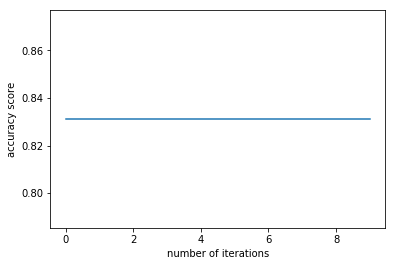

In [90]:
scores_binary = []
for i in range(10):
    scores_binary.append(sgd.score(train_data, train_readmitted))

plt.plot(range(10), scores_binary) 
plt.xlabel('number of iterations')
plt.ylabel('accuracy score')

Text(0,0.5,'accuracy score')

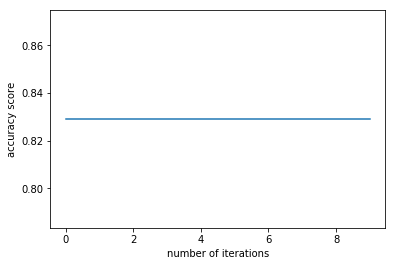

In [97]:
scores_binary = []
for i in range(10):
    scores_binary.append(sgd.score(test_data, test_readmitted))

plt.plot(range(10), scores_binary) 
plt.xlabel('number of iterations')
plt.ylabel('accuracy score')

Text(0,0.5,'accuracy score')

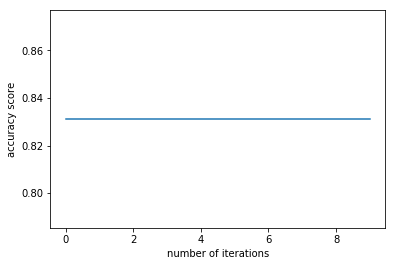

In [100]:
scores_PClass = []
for i in range(10):
    scores_PClass.append(sgd.score(train_data,train_readmitted))
  
plt.plot(range(10), scores_PClass)
plt.xlabel('number of iterations')
plt.ylabel('accuracy score')

Text(0,0.5,'accuracy score')

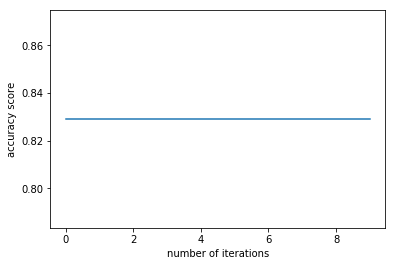

In [101]:
scores_PClass = []
for i in range(10):
    scores_PClass.append(sgd.score(test_data,test_readmitted))
  
plt.plot(range(10), scores_PClass)
plt.xlabel('number of iterations')
plt.ylabel('accuracy score')